## Load Data

In [297]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from math import log, exp
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn import linear_model
from preprocess import impute_multi_2

In [298]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [299]:
# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']
# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [300]:
y_train_raw = train_df['SalePrice']
x_train_raw = train_df.drop('SalePrice', axis=1)
x_test_raw = test_df.copy()

In [301]:
#delete the loaded csv files
del train_df, test_df

In [438]:
#This function ta
def model_to_csv(model, x_test, test_ID, csv_name):
    y = model.predict(x_test)
    y = pd.Series([round(exp(x/100)) for x in y],name='SalePrice')
    y_out = pd.concat([test_ID, y], axis=1)
    y_out.to_csv('%s' % csv_name, index = False)

In [303]:
all_data = pd.concat([x_train_raw, x_test_raw])
all_data.shape

(2919, 79)

In [304]:
##############################
# Multi Linear Ridge Model_1 #
##############################

In [305]:
#call the impute function in process module
all_data_imputed = impute_multi_2(all_data)

In [306]:
#use one_hot encoding to dummify all the category data
one_hot_df = pd.get_dummies(all_data_imputed, drop_first=True, dummy_na=True)

In [307]:
#choose the first 1460 as train sample
x_train = one_hot_df.iloc[list(range(1460)),:]
#choose the first 1460 as train sample
x_test = one_hot_df.iloc[list(range(1460,2919)),:]
#y_train transformation
y_train = [log(x) for x in y_train_raw]

In [309]:
#tranform x**0.5
x_train['LotArea'] =[x**0.5 for x in x_train.LotArea]
x_train['LotFrontage']=[x**0.5 for x in x_train.LotFrontage]
x_train['MasVnrArea']=[x**0.5 for x in x_train['MasVnrArea']]
x_train['BsmtFinSF1']=[x**0.5 for x in x_train.BsmtFinSF1]
x_train['BsmtUnfSF']=[x**0.5 for x in x_train.BsmtUnfSF]
x_train['TotalBsmtSF']=[x**0.5 for x in x_train.TotalBsmtSF]
x_train['1stFlrSF']=[x**0.5 for x in x_train['1stFlrSF']]
#transform x**0.5
x_train['2ndFlrSF']=[x**0.5 for x in x_train['2ndFlrSF']]
x_train['GrLivArea']=[x**0.5 for x in x_train['GrLivArea']]
x_train['GarageArea']=[x**0.5 for x in x_train['GarageArea']]
x_train['TotalSF']=[x**0.5 for x in x_train['TotalSF']]
x_train['OpenPorchSF']=[x**0.5 for x in x_train['OpenPorchSF']]
x_train['WoodDeckSF']=[x**0.5 for x in x_train['WoodDeckSF']]
x_train['LowQualFinSF']=[x**0.5 for x in x_train['LowQualFinSF']]

In [310]:
#test set transformation
x_test['LotArea'] =[x**0.5 for x in x_test.LotArea]
x_test['LotFrontage']=[x**0.5 for x in x_test.LotFrontage]
x_test['MasVnrArea']=[x**0.5 for x in x_test['MasVnrArea']]
x_test['BsmtFinSF1']=[x**0.5 for x in x_test.BsmtFinSF1]
x_test['BsmtUnfSF']=[x**0.5 for x in x_test.BsmtUnfSF]
x_test['TotalBsmtSF']=[x**0.5 for x in x_test.TotalBsmtSF]
x_test['1stFlrSF']=[x**0.5 for x in x_test['1stFlrSF']]
#test set transformation
x_test['2ndFlrSF']=[x**0.5 for x in x_test['2ndFlrSF']]
x_test['GrLivArea']=[x**0.5 for x in x_test['GrLivArea']]
x_test['GarageArea']=[x**0.5 for x in x_test['GarageArea']]
x_test['TotalSF']=[x**0.5 for x in x_test['TotalSF']]
x_test['OpenPorchSF']=[x**0.5 for x in x_test['OpenPorchSF']]
x_test['WoodDeckSF']=[x**0.5 for x in x_test['WoodDeckSF']]
x_test['LowQualFinSF']=[x**0.5 for x in x_test['LowQualFinSF']]

In [311]:
alphas = np.logspace(-1, 0.1, 30)

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


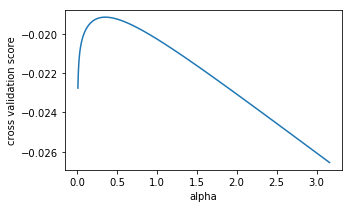

In [312]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-2, 0.5, 100)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Ridge(alpha, normalize=True), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [313]:
np.argmax(scores)

61

In [314]:
alphas[61]

0.34705958281810667

In [315]:
ridge_1st = linear_model.Ridge(alphas[61], normalize=True)

In [316]:
ridge_1st.fit(x_train, y_train)

Ridge(alpha=0.34705958281810667, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [317]:
ridge_1st.score(x_train, y_train)

0.92195017863193474

In [262]:
model_to_csv(ridge_1st, x_test, test_ID, 'mul_ridge_1st.csv')

In [ ]:
#When use cv=10, multi_2 ,alpha is changed from 0.35 to 0.43, but the score droped to 0.135
#When use cv=5, multi_2 , the score is 0.134
#When use cv=5, multi_1, the score is 0.133

##  Ridge Regression model _3
 use our own dummify and encoding method

In [210]:
#load data
train_df_3 = pd.read_csv('train_fe1.csv', index=)
test_df_3 = pd.read_csv('test_fe1.csv')

In [214]:
train_df_3.columns

Index(['Unnamed: 0', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SalePrice'],
      dtype='object', length=214)

In [215]:
train_df_3=train_df_3.drop('Unnamed: 0', axis=1)

In [216]:
train_df_3.drop('MiscVal', axis=1, inplace=True)

In [217]:
test_df_3.drop('Unnamed: 0', axis=1, inplace=True)

In [218]:
test_df_3.drop('MiscVal', axis=1, inplace=True)

In [219]:
x_train_3 = train_df_3.drop('SalePrice', axis=1)
y_train_3 = train_df_3.SalePrice

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


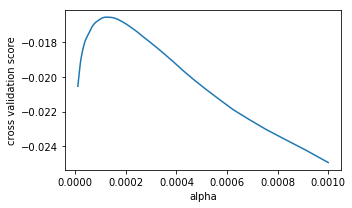

In [230]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-5, -3, 50)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Lasso(alpha, normalize=True), x_train_3, y_train_3, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [231]:
np.argmax(scores)

27

In [232]:
alphas[27]

0.00012648552168552957

In [234]:
Lasso_2nd = linear_model.Ridge(alphas[27], normalize=True)

In [235]:
Lasso_2nd.fit(x_train_3, y_train_3)

Ridge(alpha=0.00012648552168552957, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [236]:
Lasso_2nd.score(x_train_3, y_train_3)

0.94219370246505108

In [237]:
model_to_csv(Lasso_2nd, test_df_3, test_ID, 'Lasso_Model3.csv')

## Lasso Regression

In [ ]:
###############################
        ## Lasso_1 ##
###############################

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

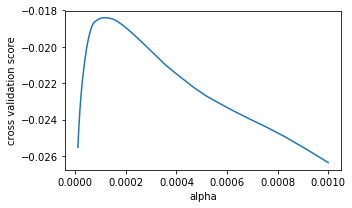

In [318]:
alphas = np.logspace(-5, -3, 50)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Lasso(alpha, normalize=True), x_train, y_train, cv=5,
                          scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [319]:
np.argmax(scores)

26

In [320]:
alphas[26]

0.00011513953993264469

In [321]:
lasso_1st = linear_model.Lasso(alphas[26], normalize=True)

In [322]:
lasso_1st.fit(x_train, y_train)

Lasso(alpha=0.00011513953993264469, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [323]:
lasso_1st.score(x_train, y_train)

0.91601038794826239

In [269]:
model_to_csv(lasso_1st, x_test, test_ID, 'mul_lasso_1st.csv')

### Lasso Coefficent Analysis

In [324]:
coef_df_lasso = pd.concat([pd.Series(lasso_1st.coef_, name='coef'), pd.Series(x_train.columns,
                                                                                     name='Features')], axis=1)

In [325]:
coef_df_lasso.loc[coef_df_lasso.coef!=0,:].sort_values(by='coef', ascending=False).head()

,coef,Features
89,0.101999,Neighborhood_NridgHt
79,0.094549,Neighborhood_Crawfor
95,0.092549,Neighborhood_StoneBr
311,0.082428,SaleType_New
150,0.066180,RoofMatl_WdShngl


In [326]:
x_train.loc[x_train.Condition2_PosN !=0, :]

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_FV,MSZoning_RH,...,GarageType_None,GarageType_nan,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Fence_nan,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
523,11.401754,200.234862,10,58,27.604347,47.539457,0.0,29.631065,56.017854,56.017854,39.217343,0.0,68.381284,1.0,0.0,3,1,3,1,11,1,2007.0,3.0,29.732137,14.422205,20.149442,0,0,0,0,0,88.396833,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
825,10.677078,121.667580,10,58,28.565714,40.447497,0.0,21.023796,45.585085,45.650849,0.000000,0.0,45.650849,1.0,0.0,2,0,2,1,7,1,2007.0,3.0,34.928498,13.711309,6.708204,0,0,0,0,0,64.513564,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [327]:
x_test.loc[x_train.Condition2_PosN !=0, :]

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_FV,MSZoning_RH,...,GarageType_None,GarageType_nan,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Fence_nan,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
523,6.000000,49.477268,7,54,10.295630,0.000000,0.0,27.640550,27.640550,27.640550,29.359837,0.0,40.323690,0.0,0.0,2,1,2,1,6,0,2003.0,2.0,21.771541,0.0,5.196152,0,0,0,0,0,48.887626,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
825,8.062258,84.557673,5,16,7.211103,26.925824,0.0,16.217275,31.432467,31.432467,0.000000,0.0,31.432467,1.0,0.0,1,0,3,1,5,0,1974.0,1.0,18.973666,0.0,0.000000,0,0,0,0,0,44.452222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [442]:
all_data_eng = all_data.copy()
all_data_eng = impute_multi_2(all_data_eng)
#use one_hot encoding to dummify all the category data
all_data_eng = pd.get_dummies(all_data_eng, drop_first=True, dummy_na=True)

In [443]:
temp = all_data_eng.copy()

In [444]:
###choose the cut off of 2919*0.025 to filter out the binary column with a high unbalanced class.
drop_list=[]
for col in all_data_eng.columns:
    if len(all_data_eng[col].unique()) == 2 :
        if (all_data_eng.groupby(col).count()['LotFrontage'][0]>73) & (all_data_eng.groupby(col).count()['LotFrontage'][1]>73):
            continue
        else:
            drop_list.append(col)
#            all_data_eng.drop(col, axis=1, inplace=True)
    else:
        continue

In [445]:
len(drop_list)

115

In [446]:
all_data_eng.drop(drop_list, axis=1, inplace=True)

In [447]:
all_data_eng.shape

(2919, 206)

In [448]:
#choose the first 1460 as train sample
x_train = all_data_eng.iloc[list(range(1460)),:]
#choose the first 1460 as train sample
x_test = all_data_eng.iloc[list(range(1460,2919)),:]
#y_train transformation
y_train = [100*log(x) for x in y_train_raw]

In [449]:
#tranform x**0.5
x_train['LotArea'] =[x**0.5 for x in x_train.LotArea]
x_train['LotFrontage']=[x**0.5 for x in x_train.LotFrontage]
x_train['MasVnrArea']=[x**0.5 for x in x_train['MasVnrArea']]
x_train['BsmtFinSF1']=[x**0.5 for x in x_train.BsmtFinSF1]
x_train['BsmtUnfSF']=[x**0.5 for x in x_train.BsmtUnfSF]
x_train['TotalBsmtSF']=[x**0.5 for x in x_train.TotalBsmtSF]
x_train['1stFlrSF']=[x**0.5 for x in x_train['1stFlrSF']]
#transform x**0.5
x_train['2ndFlrSF']=[x**0.5 for x in x_train['2ndFlrSF']]
x_train['GrLivArea']=[x**0.5 for x in x_train['GrLivArea']]
x_train['GarageArea']=[x**0.5 for x in x_train['GarageArea']]
x_train['TotalSF']=[x**0.5 for x in x_train['TotalSF']]
x_train['OpenPorchSF']=[x**0.5 for x in x_train['OpenPorchSF']]
x_train['WoodDeckSF']=[x**0.5 for x in x_train['WoodDeckSF']]
x_train['LowQualFinSF']=[x**0.5 for x in x_train['LowQualFinSF']]

In [450]:
#test set transformation
x_test['LotArea'] =[x**0.5 for x in x_test.LotArea]
x_test['LotFrontage']=[x**0.5 for x in x_test.LotFrontage]
x_test['MasVnrArea']=[x**0.5 for x in x_test['MasVnrArea']]
x_test['BsmtFinSF1']=[x**0.5 for x in x_test.BsmtFinSF1]
x_test['BsmtUnfSF']=[x**0.5 for x in x_test.BsmtUnfSF]
x_test['TotalBsmtSF']=[x**0.5 for x in x_test.TotalBsmtSF]
x_test['1stFlrSF']=[x**0.5 for x in x_test['1stFlrSF']]
#test set transformation
x_test['2ndFlrSF']=[x**0.5 for x in x_test['2ndFlrSF']]
x_test['GrLivArea']=[x**0.5 for x in x_test['GrLivArea']]
x_test['GarageArea']=[x**0.5 for x in x_test['GarageArea']]
x_test['TotalSF']=[x**0.5 for x in x_test['TotalSF']]
x_test['OpenPorchSF']=[x**0.5 for x in x_test['OpenPorchSF']]
x_test['WoodDeckSF']=[x**0.5 for x in x_test['WoodDeckSF']]
x_test['LowQualFinSF']=[x**0.5 for x in x_test['LowQualFinSF']]

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

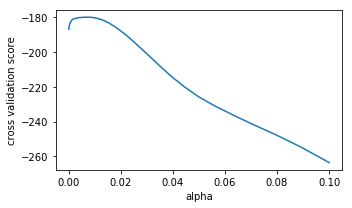

In [451]:
alphas = np.logspace(-6, -1, 100)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Lasso(alpha, normalize=True), x_train, y_train, cv=5,
                          scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [452]:
np.argmax(scores)

77

In [453]:
alphas[77]

0.0077426368268112694

In [454]:
lasso_3 = linear_model.Lasso(alphas[77], normalize=True)

In [455]:
lasso_3.fit(x_train, y_train)

Lasso(alpha=0.0077426368268112694, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [456]:
lasso_3.score(x_train, y_train)

0.90563268164200228

In [439]:
model_to_csv(lasso_3, x_test, test_ID, 'mul_lasso_1st.csv')

## TREE Model

In [205]:
from sklearn import ensemble
RF = ensemble.RandomForestRegressor()
#dir(ensemble)

In [206]:
RF.set_params(oob_score=True, random_state=42)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [ ]:
y_train_t = y_train_raw.copy()
x_train_t = x_train_raw.copy()
x_test_t = x_test_raw.copy()

In [208]:
##SalePrice is logged.
y_train_t = [log(x) for x in y_train_t]

In [209]:
#call the impute function in process module
all_data_imputed = impute_multi_2(all_data)

In [207]:
tree_m1 = RF.fit(x_train_t, y_train_t)

ValueError: could not convert string to float: 'Normal'

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_para_forest = [{
    "n_estimators": [25, 100, 5],
    "min_samples_leaf": range(1, 3),
    "min_samples_split": np.linspace(start=2, stop=30, num=3, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1, verbose=1)
%time grid_search_forest.fit(x_train, y_train)

In [299]:
#temp=pd.concat([pd.DataFrame(ridge_1st.coef_),pd.DataFrame(x_test.columns)], axis=1)
#temp.loc[abs(temp.iloc[:,0])>0.03,:]